# Introduction

(TODO)



# Setup

In [9]:
#Common imports
import numpy as np
import os, sys, zipfile
import urllib.request
import shutil

#Deep learning
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

#Reproducibility
np.random.seed(23)
tf.random.set_seed(23)

#Plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Dataset utilities
from pycocotools.coco import COCO

In [159]:
ROOT_PATH = "."
DATA_DIR = os.path.join(ROOT_PATH, "data")
coco_year = 2017

In [10]:
# Setup data paths
dataDir = './data'
dataType = 'val2017'
annDir = '{}/annotations'.format(dataDir)
annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/instances_{}.json'.format(annDir, dataType)
annURL = 'http://images.cocodataset.org/annotations/annotations_train{}.zip'.format(dataType)
print (annDir)
print (annFile)
print (annZipFile)
print (annURL)

./data/annotations
./data/annotations/instances_val2017.json
./data/annotations_trainval2017.zip
http://images.cocodataset.org/annotations/annotations_trainval2017.zip


# Get the data

In [160]:
def download_annotations(data_dir, year="2017", delete_zip=False):
    """
    Create annotations folder in data dir and download `year` COCO annotations.
    
    """
    year = str(year)
    ANN_FOLDER = os.path.join(data_dir, "annotations")
    ANN_ZIP_FILE_PATH = os.path.join(ANN_FOLDER, "annotations_train{}.zip".format(year))
    ANN_URL = r"http://images.cocodataset.org/annotations/annotations_trainval{}.zip".format(year)
    
    if not os.path.exists(ANN_FOLDER):
        print("Creating annotations folder: {}".format(ANN_FOLDER))
        os.makedirs(ANN_FOLDER)
        if not os.path.exists(ANN_ZIP_FILE_PATH):
            print("Downloading annotations...")
            with urllib.request.urlopen(ANN_URL) as resp, open(ANN_ZIP_FILE_PATH, 'wb') as out:
                shutil.copyfileobj(resp, out)
            print ("... done downloading.")
        
    print("Unzipping {}".format(ANN_ZIP_FILE_PATH))
    with zipfile.ZipFile(ANN_ZIP_FILE_PATH,"r") as zip_ref:
        zip_ref.extractall(data_dir)
    print ("... done unzipping")
        
    if delete_zip:
        print("Removing original zip file...")
        os.remove(ANN_ZIP_FILE_PATH)
    print("... done")
    print("All done")

In [161]:
download_annotations(DATA_DIR, coco_year, delete_zip=True)

Creating annotations folder: .\data\annotations
... done downloading.
Unzipping .\data\annotations\annotations_train2017.zip
... done unzipping
Removing original zip file...
... done
All done


In [13]:
# Download data if not available locally
if not os.path.exists(annDir):
    os.makedirs(annDir)
if not os.path.exists(annFile):
    if not os.path.exists(annZipFile):
        print ("Downloading zipped annotations to " + annZipFile + " ...")
        with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
            shutil.copyfileobj(resp, out)
        print ("... done downloading.")
    print ("Unzipping " + annZipFile)
    with zipfile.ZipFile(annZipFile,"r") as zip_ref:
        zip_ref.extractall(dataDir)
    print ("... done unzipping")
print ("Will use annotations in " + annFile)

... done downloading.
Unzipping ./data/annotations_trainval2017.zip
... done unzipping
Will use annotations in ./data/annotations/instances_val2017.json


In [14]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


In [17]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor kitchen accessory food electronic person vehicle sports indoor animal furniture appliance


In [74]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [75]:
img

{'license': 1,
 'file_name': '000000324158.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000324158.jpg',
 'height': 334,
 'width': 500,
 'date_captured': '2013-11-19 23:54:06',
 'flickr_url': 'http://farm1.staticflickr.com/169/417836491_5bf8762150_z.jpg',
 'id': 324158}

In [76]:
imgIds

[324158]

In [77]:
DOWNLOAD_PATH = os.path.join('.', 'data' , 'val') 
DOWNLOAD_PATH

'.\\data\\val'

In [78]:
coco.download(DOWNLOAD_PATH, imgIds)

downloaded 0/1 images (t=0.0s)


In [79]:
img_name = str(imgIds[0]).zfill(12) + ".jpg"
img_name

'000000324158.jpg'

In [80]:
img_path = os.path.join(DOWNLOAD_PATH, img_name)
img_path

'.\\data\\val\\000000324158.jpg'

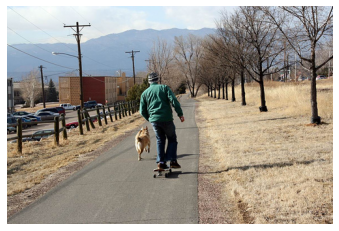

In [81]:
I = plt.imread(img_path)
plt.figure()
plt.axis('off')
plt.imshow(I)

In [87]:
I.shape

(334, 500, 3)

In [82]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds

[10673, 638724, 2162813]

In [88]:
anns = coco.loadAnns(annIds)

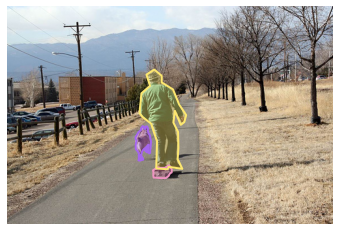

In [122]:
plt.figure()
plt.imshow(I); 
plt.axis('off')
coco.showAnns(anns)

In [96]:
[(ann['image_id'], ann['bbox']) for ann in anns]

[(324158, [196.51, 183.36, 23.95, 53.02]),
 (324158, [223.48, 243.72, 28.67, 19.61]),
 (324158, [202.71, 96.55, 71.78, 153.14])]

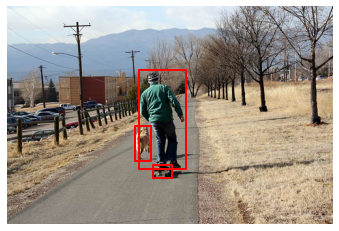

In [112]:
polygons = []
for ann in anns:
    [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
    poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
    np_poly = np.array(poly)#.reshape((4,2))
    polygons.append(mpl.patches.Polygon(np_poly))

plt.figure()
plt.imshow(I)
plt.axis('off')
p = mpl.collections.PatchCollection(polygons, facecolor='none', edgecolors="red", linewidths=2)
plt.gca().add_collection(p)


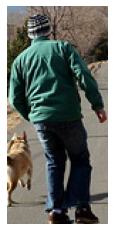

In [121]:
[bbox_x, bbox_y, bbox_w, bbox_h] = map(int, anns[2]['bbox'])
plt.axis('off')
plt.imshow(I[bbox_y:bbox_y+bbox_h, bbox_x:bbox_x+bbox_w])

# References

- [Coco dataset](https://cocodataset.org/#home)
- [CocoAPI for Python3 and Windows](https://github.com/philferriere/cocoapi#egg=pycocotools^&subdirectory=PythonAPI)
- [Visual wake word dataset](https://arxiv.org/abs/1906.05721)